# My first example notebook

Here is an example of a basic python for loop

In [1]:
for i in range(5):
    print(i)

0
1
2
3
4


## Custom function to print non-dunder attributes

In [ ]:
def pdir(obj):
    print([a for a in dir(obj) if not a.startswith('_')])

## Load pandas library

In [3]:
import pandas as pd

### Load a TSV file and display its metadata

In [4]:
df = pd.read_csv('chipotle.tsv', sep='\t')
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   order_id            4622 non-null   int64
 1   quantity            4622 non-null   int64
 2   item_name           4622 non-null   str  
 3   choice_description  3376 non-null   str  
 4   item_price          4622 non-null   str  
dtypes: int64(2), str(3)
memory usage: 180.7 KB


### Describe the content (numerical) of the dataframe

In [5]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### Get the first 10 records from the dataframe

In [6]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Get the last few records (default 5) from the dataframe

In [23]:
df.tail()

,order_id,quantity,item_name,choice_description,item_price,total_amount
4617,1833,1,STEAK BURRITO,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,STEAK BURRITO,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,CHICKEN SALAD BOWL,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,CHICKEN SALAD BOWL,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75
4621,1834,1,CHICKEN SALAD BOWL,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75,8.75


### Following are the useful dataframe methods:
- head
- tail
- sample
- info
- describe

Also, we have these constants:
- shape
- columns
- dtype

Here's an example usage of the `head` function:

```python
df.head()
df.head(10)
```

In [8]:
df.sample()

,order_id,quantity,item_name,choice_description,item_price
1416,575,1,Chips and Guacamole,NaN,$4.00


### df.shape

Returns the shape (dimension) of the dataframe

In [9]:
df.shape

(4622, 5)

In [10]:
df.dtypes

order_id              int64
quantity              int64
item_name               str
choice_description      str
item_price              str
dtype: object

In [11]:
print(f'Number of rows = {df.shape[0]} and number of columns = {df.shape[1]}')

Number of rows = 4622 and number of columns = 5


### Create a new dataframe from an existig one with specific colum

In [12]:
item_names = df['item_name']
item_names.describe()

count             4622
unique              50
top       Chicken Bowl
freq               726
Name: item_name, dtype: object

### Create a new dataframe using an existing one with 2 or more columns

In [13]:
items = df[['item_name', 'item_price', 'quantity']]
items

,item_name,item_price,quantity
0,Chips and Fresh Tomato Salsa,$2.39,1
1,Izze,$3.39,1
2,Nantucket Nectar,$3.39,1
3,Chips and Tomatillo-Green Chili Salsa,$2.39,1
4,Chicken Bowl,$16.98,2
...,...,...,...
4617,Steak Burrito,$11.75,1
4618,Steak Burrito,$11.75,1
4619,Chicken Salad Bowl,$11.25,1
4620,Chicken Salad Bowl,$8.75,1


In [14]:
df['item_name'].str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: str

#### Convert `item_name` into uppercase

In [15]:
df['item_name'] = df['item_name'].str.upper()

#### Remove `$` from `item_price` and store the same as `float`

In [16]:
df['item_price'] = df['item_price'].str.replace('$', '').astype('float')

#### Add a new column called `total_amount` which is the product of `quantity` and `item_price`

In [17]:
df['total_amount'] = df['quantity'] * df['item_price']

#### Display the unique/distinct item names`

In [18]:
df['item_name'].unique()

<StringArray>
[         'CHIPS AND FRESH TOMATO SALSA',
                                  'IZZE',
                      'NANTUCKET NECTAR',
 'CHIPS AND TOMATILLO-GREEN CHILI SALSA',
                          'CHICKEN BOWL',
                         'SIDE OF CHIPS',
                         'STEAK BURRITO',
                      'STEAK SOFT TACOS',
                   'CHIPS AND GUACAMOLE',
                  'CHICKEN CRISPY TACOS',
                    'CHICKEN SOFT TACOS',
                       'CHICKEN BURRITO',
                           'CANNED SODA',
                      'BARBACOA BURRITO',
                      'CARNITAS BURRITO',
                         'CARNITAS BOWL',
                         'BOTTLED WATER',
 'CHIPS AND TOMATILLO GREEN CHILI SALSA',
                         'BARBACOA BOWL',
                                 'CHIPS',
                    'CHICKEN SALAD BOWL',
                            'STEAK BOWL',
                   'BARBACOA SOFT TACOS',
                    

#### Group the data based on `item_name` and find the product count and sum of `total_amount`

In [19]:
item_agg = df.groupby('item_name', as_index=False).agg(item_count=('item_name', 'count'), item_total=('total_amount', 'sum'))
item_agg

,item_name,item_count,item_total
0,6 PACK SOFT DRINK,54,369.93
1,BARBACOA BOWL,66,672.36
2,BARBACOA BURRITO,91,894.75
3,BARBACOA CRISPY TACOS,11,138.71
4,BARBACOA SALAD BOWL,10,106.40
5,BARBACOA SOFT TACOS,25,250.46
6,BOTTLED WATER,162,649.18
7,BOWL,2,74.00
8,BURRITO,6,44.40
9,CANNED SODA,104,191.84


In [20]:
item_agg.info()

<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_name   50 non-null     str    
 1   item_count  50 non-null     int64  
 2   item_total  50 non-null     float64
dtypes: float64(1), int64(1), str(1)
memory usage: 1.3 KB


## Visualization using matplotlib

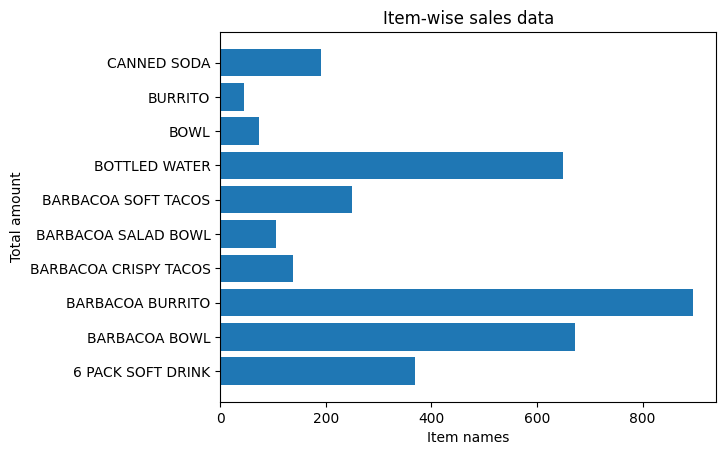

In [21]:
# load the required library
import matplotlib.pyplot as plt

plt.figure()
plt.barh(item_agg['item_name'][:10], item_agg['item_total'][:10])

# give labels for axes
plt.xlabel('Item names')
plt.ylabel('Total amount')

# give a title to the chart
plt.title('Item-wise sales data')

plt.show()

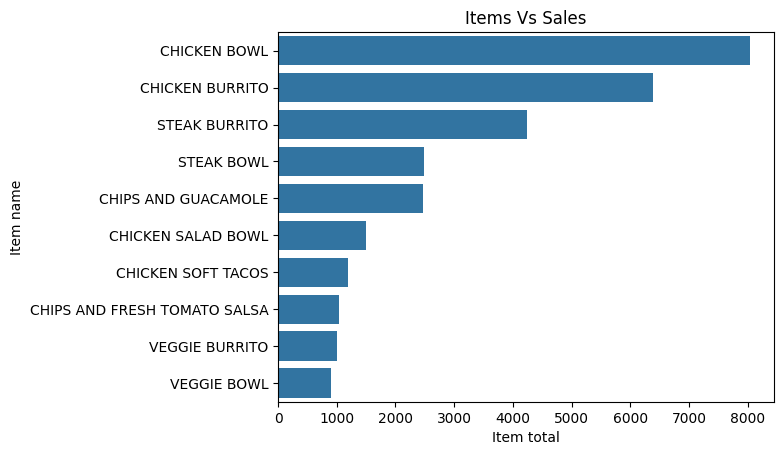

In [22]:
highest_10_sales = item_agg.sort_values(by='item_total', ascending=False).head(10)

import seaborn as sns

plt.figure()

sns.barplot(data=highest_10_sales, y='item_name', x='item_total', orient='horizontal')
plt.ylabel('Item name')
plt.xlabel('Item total')
plt.title('Items Vs Sales')


plt.show()